# Assigment 3 - TripAdvisor

The data set you are given is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.

* Attribute 1 : Unique user id
* Attribute 2 : Average user feedback on art galleries
* Attribute 3 : Average user feedback on dance clubs
* Attribute 4 : Average user feedback on juice bars
* Attribute 5 : Average user feedback on restaurants
* Attribute 6 : Average user feedback on museums
* Attribute 7 : Average user feedback on resorts
* Attribute 8 : Average user feedback on parks/picnic spots
* Attribute 9 : Average user feedback on beaches
* Attribute 10 : Average user feedback on theaters
* Attribute 11 : Average user feedback on religious institutions

Your task is to cluster the users based on the ratings they have left on Trip Advisor. 

At the bottom of your code, you need to create a recommendation function that will take 2 User IDs (e.g. recommend("User 1", "User 2")) as input and will return "Yes" or "No" to the question on whether we can recommend the destinations User 2 likes to User 1. (Hint: if they are in the same cluster, your function should return "Yes") Run your function to show answers to the following questions:

- For User 8, is it better to suggest the destinations User 28 likes or the destinations User 29 likes?
- For User 11, is it better to suggest the destinations User 16 likes or the destinations User 28 likes?

For both questions, please explain your answer in detail.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TripAdvisor = pd.read_csv('tripadvisor_review.csv')

In [3]:
TripAdvisor.head(4)

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86


In [4]:
TripAdvisor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [5]:
TripAdvisor.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [6]:
from sklearn.cluster import KMeans

In [7]:
X=TripAdvisor.drop("User ID",axis=1)

In [8]:
X.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [9]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',random_state=42)

In [10]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [11]:
pred=kmeans.predict(X)

In [12]:
kmeans.inertia_

1179.753443277768

In [13]:
from sklearn import metrics
metrics.silhouette_score(X, pred)

0.30085279300986595

In [14]:
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    pred=kmeans.predict(X)
    wcss.append(kmeans.inertia_)

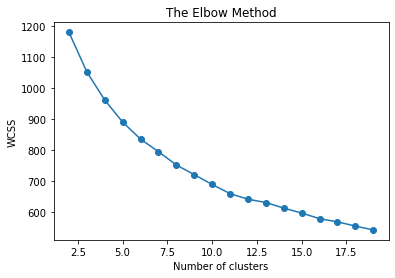

In [15]:
plt.plot(range(2, 20), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
s_score = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    pred=kmeans.predict(X)
    s_score.append(metrics.silhouette_score(X, pred))

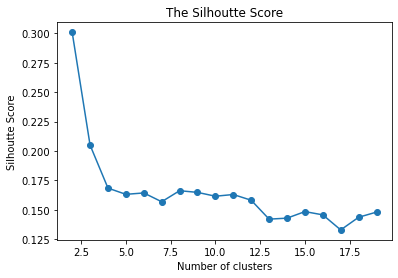

In [17]:
plt.plot(range(2, 20), s_score,marker='o')
plt.title('The Silhoutte Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state=42)
kmeans.fit(X)
pred=kmeans.predict(X)

In [19]:
pred

array([3, 3, 1, 1, 3, 1, 1, 1, 2, 2, 2, 2, 0, 0, 3, 3, 0, 0, 3, 0, 2, 2,
       1, 1, 2, 0, 3, 2, 1, 3, 0, 0, 3, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 1, 3, 3, 3, 1, 1, 1, 2, 1,
       0, 1, 0, 1, 1, 0, 2, 0, 0, 3, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 3, 3, 3, 1, 0, 0, 0, 2, 2, 1, 3, 1, 1, 0, 2, 1, 1, 3,
       2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1, 1, 2, 2, 1, 0, 3,
       3, 3, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2,
       1, 1, 2, 1, 3, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 3, 3, 0, 3, 2, 2, 1, 3, 1, 0, 0, 1, 2, 2, 1, 0, 3,
       1, 2, 3, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 3, 1, 1, 3, 0,
       2, 1, 0, 1, 3, 1, 2, 0, 2, 0, 1, 3, 1, 1, 2, 2, 3, 2, 2, 1, 0, 3,
       1, 1, 1, 1, 1, 3, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 3, 2, 3, 2, 3,
       1, 3, 3, 2, 1, 3, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 3, 2, 1,
       2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1,

In [20]:
TripAdvisor['cluster'] = pred

In [21]:
TripAdvisor.head(30)

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,cluster
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,3
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,3
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,1
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,3
5,User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66,1
6,User 7,0.90,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22,1
7,User 8,0.74,1.40,0.22,0.41,0.82,1.50,3.17,2.81,1.54,2.88,1
8,User 9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54,2
9,User 10,0.70,1.36,0.22,0.26,1.50,1.54,3.17,2.82,2.24,3.12,2


In [22]:
TripAdvisor.set_index('User ID', inplace=True)
TripAdvisor.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,cluster
User ID,,,,,,,,,,,
User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,3
User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,3
User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,1
User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,3


In [23]:
def recommendation(user_a, user_b):
    cluster_a = TripAdvisor.loc[user_a].cluster
    cluster_b = TripAdvisor.loc[user_b].cluster
    
    if cluster_a == cluster_b:
        return 'Yes'
    
    return 'No'


In [24]:
print(recommendation('User 8', 'User 28'))

No


In [25]:
print(recommendation('User 8', 'User 29'))

Yes


According to the prediction, the User 8 belongs to cluster 1. For the recommendations, the User 28 belongs to cluster 2 but User 29 belongs to cluster 1. So it is better to suggest User 8 the destinations User 29 likes.

In [26]:
print(recommendation('User 11', 'User 16'))

No


In [27]:
print(recommendation('User 11', 'User 28'))

Yes


According to the prediction, the User 11 belongs to cluster 2. For the recommendations, the User 16 belongs to cluster 3 but User 28 belongs to cluster 2. So it is better to suggest User 11 the destinations User 28 likes.

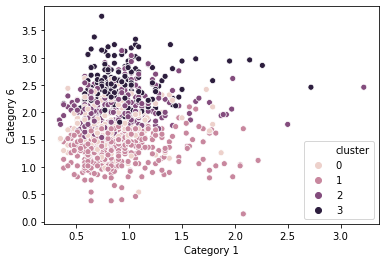

In [28]:
sns.scatterplot("Category 1", "Category 6",data=TripAdvisor,hue="cluster")